In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
df = pd.read_table("Downloads/adult.data", sep=", ", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

C:\Users\SarahCharles\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


C:\Users\SarahCharles\anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


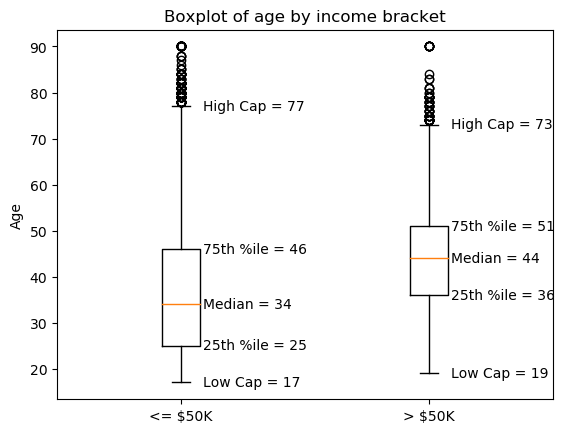

In [116]:
highage = df["age"].loc[df["income"] == ">50K"]
lowage = df["age"].loc[df["income"] == "<=50K"]
fig,ax = plt.subplots()
bx = plt.boxplot(np.array([lowage,highage]))
iqr1 = bx['boxes'][0]
iqr2 = bx['boxes'][1]
caps = bx['caps']
med1 = bx['medians'][0]
med2 = bx['medians'][1]
xpos1 = med1.get_xdata()
xpos2 = med2.get_xdata()
xoff1 = 0.10 * (xpos1[1] - xpos1[0])
xoff2 = 0.10 * (xpos2[1] - xpos2[0])
xlabel1 = xpos1[1] + xoff1
xlabel2 = xpos2[1] + xoff2
median1 = med1.get_ydata()[1]
median2 = med2.get_ydata()[1]
pc25_1 = iqr1.get_ydata().min()
pc25_2 = iqr2.get_ydata().min()
pc75_1 = iqr1.get_ydata().max()
pc75_2 = iqr2.get_ydata().max()
capbottom1 = caps[0].get_ydata()[0]
capbottom2 = caps[2].get_ydata()[0]
captop1 = caps[1].get_ydata()[0]
captop2 = caps[3].get_ydata()[0]
ax.set_xticklabels(["<= $50K", "> $50K"])
ax.text(xlabel1, median1, 'Median = {:2g}'.format(median1), va='center')
ax.text(xlabel2, median2, 'Median = {:2g}'.format(median2), va='center')
ax.text(xlabel1, pc25_1,'25th %ile = {:2g}'.format(pc25_1), va='center')
ax.text(xlabel2, pc25_2,'25th %ile = {:2g}'.format(pc25_2), va='center')
ax.text(xlabel1, pc75_1,'75th %ile = {:2g}'.format(pc75_1), va='center')
ax.text(xlabel2, pc75_2,'75th %ile = {:2g}'.format(pc75_2), va='center')
ax.text(xlabel1, capbottom1,'Low Cap = {:2g}'.format(capbottom1), va='center')
ax.text(xlabel2, capbottom2,'Low Cap = {:2g}'.format(capbottom2), va='center')
ax.text(xlabel1, captop1,'High Cap = {:2g}'.format(captop1), va='center')
ax.text(xlabel2, captop2,'High Cap = {:2g}'.format(captop2), va='center')
plt.title('Boxplot of age by income bracket')
plt.ylabel("Age")
plt.show()

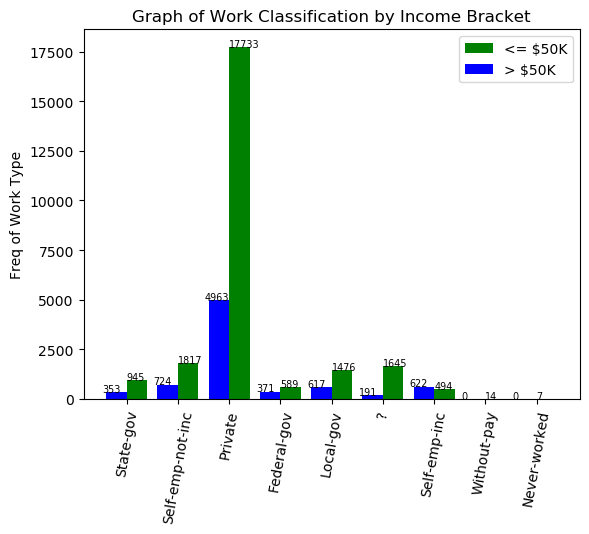

In [147]:
highwork = df["workclass"].loc[df["income"] == ">50K"].value_counts()
highwork = highwork.to_dict()
lowwork = df["workclass"].loc[df["income"] == "<=50K"].value_counts()
lowwork = lowwork.to_dict()
worktype = df["workclass"].unique().tolist()
workcountlow =[]
workcounthigh = []
for w in worktype:
    if w in highwork:
       workcounthigh.append(highwork[w])
    else:
        workcounthigh.append(0)
    if w in lowwork:
        workcountlow.append(lowwork[w])
    else:
        workcountlow.append(0)
fig,ax = plt.subplots()
barlow = ax.bar(worktype, workcountlow, width=0.4, align='edge', color='g')
barhigh = ax.bar(worktype, workcounthigh, width=-0.4, align='edge', color='b')
ax.legend((barlow[0],barhigh[0]),("<= $50K", "> $50K"))
for bar in barlow:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 5, yval, size='x-small')
for bar in barhigh:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.475, yval + 5, yval, size='x-small')
plt.xticks(range(len(worktype)),worktype, rotation=80)
plt.ylabel("Freq of Work Type")
plt.title("Graph of Work Classification by Income Bracket")
plt.show()

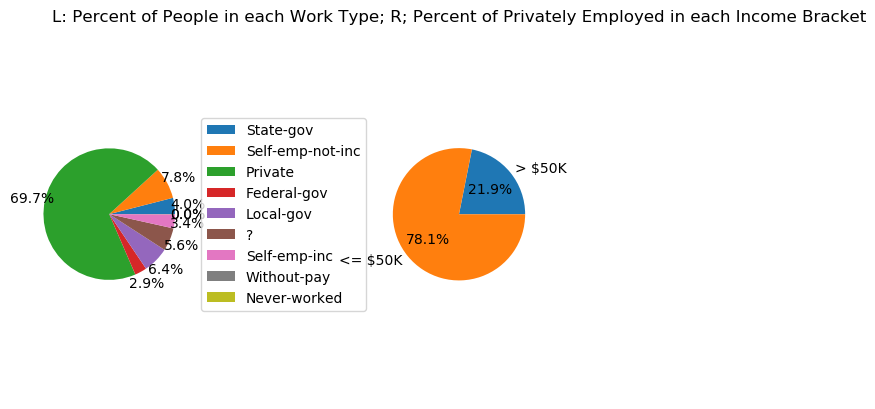

In [145]:
totalworkcount = []
for i in range(len(workcountlow)):
    totalworkcount.append(workcountlow[i] + workcounthigh[i])
fig,ax = plt.subplots()
plt.subplot(1,3,1)
p = plt.pie(totalworkcount, labels=worktype, labeldistance=None, autopct='%1.1f%%', pctdistance=1.2, shadow=False)
plt.axis('equal')
plt.subplot(1,3,2)
p = plt.pie(totalworkcount, radius=0, shadow=False)
plt.axis('equal')
plt.legend(p[0], worktype, loc='center')
plt.subplot(1,3,3)
private = [highwork['Private'], lowwork['Private']]
plt.pie(private, labels=['> $50K', '<= $50K'], autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title('L: Percent of People in each Work Type; R; Percent of Privately Employed in each Income Bracket')
plt.show()

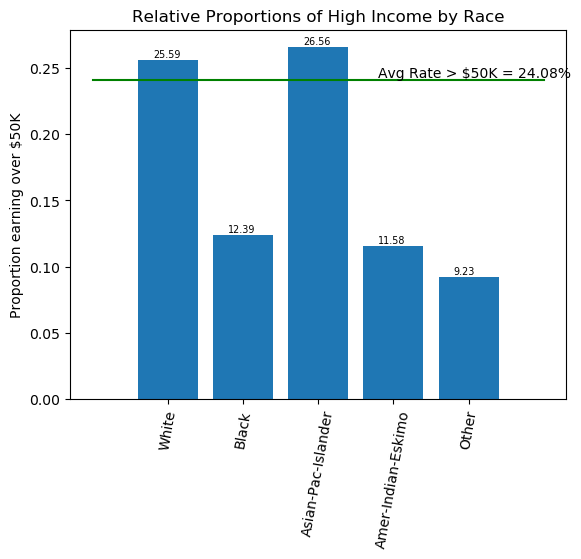

In [171]:
raceover = df["race"].loc[df["income"] == ">50K"].value_counts()
raceover = raceover.to_dict()
racetotals = df["race"].value_counts()
racetotals = racetotals.to_dict()
racecats = df["race"].unique().tolist()
raceovercount =[]
racetotalcount = []
for r in racecats:
    tempover = 0
    temptotal = 0
    if r in raceover:
        tempover = raceover[r]
    if r in racetotals:
        temptotal = racetotals[r]
    racetotalcount.append(temptotal)
    raceovercount.append(tempover)
ratios = []
for i in range(len(raceovercount)):
    ratios.append(raceovercount[i]/(racetotalcount[i]+0.00001))
poprate = round(sum(raceovercount)/sum(racetotalcount), 4)
fig,ax = plt.subplots()
bars = ax.bar(racecats, ratios)
for b in bars:
    yval = b.get_height()
    plt.text(b.get_x() + 0.2, yval + .002, round(yval*100, 2), size='x-small')
plt.xticks(range(len(racecats)),racecats, rotation=80)
plt.plot([-1,len(racecats)], [poprate,poprate], 'g-')
plt.text(len(racecats)-2.2, poprate+.002, "Avg Rate > $50K = {r}%".format(r = poprate*100))
plt.ylabel("Percent earning over $50K")
plt.title("Relative Proportions of High Income by Race")
plt.show()

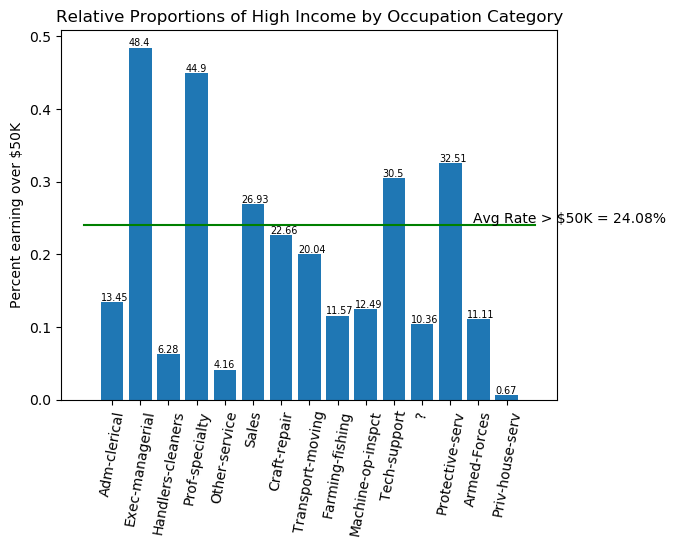

In [176]:
occover = df["occupation"].loc[df["income"] == ">50K"].value_counts()
occover = occover.to_dict()
occtotals = df["occupation"].value_counts()
occtotals = occtotals.to_dict()
occcats = df["occupation"].unique().tolist()
occovercount =[]
occtotalcount = []
for o in occcats:
    tempover = 0
    temptotal = 0
    if o in occover:
        tempover = occover[o]
    if o in occtotals:
        temptotal = occtotals[o]
    occtotalcount.append(temptotal)
    occovercount.append(tempover)
ratios = []
for i in range(len(occovercount)):
    ratios.append(occovercount[i]/(occtotalcount[i]+0.00001))
poprate = round(sum(occovercount)/sum(occtotalcount), 4)
fig,ax = plt.subplots()
bars = ax.bar(occcats, ratios)
for b in bars:
    yval = b.get_height()
    plt.text(b.get_x(), yval + .002, round(yval*100, 2), size='x-small')
plt.xticks(range(len(occcats)),occcats, rotation=80)
plt.plot([-1,len(occcats)], [poprate,poprate], 'g-')
plt.text(len(occcats)-2.2, poprate+.002, "Avg Rate > $50K = {r}%".format(r = poprate*100))
plt.ylabel("Percent earning over $50K")
plt.title("Relative Proportions of High Income by Occupation Category")
plt.show()

8365


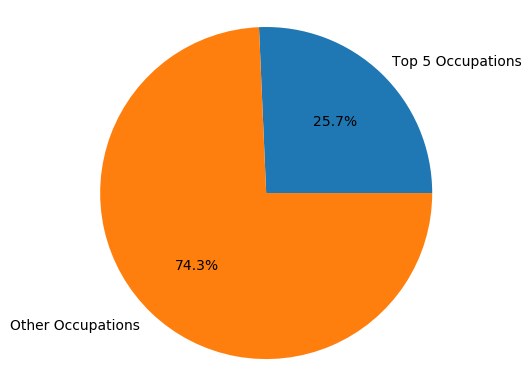

In [183]:
highjobs = ['Exec-managerial', 'Prof-speciality', 'Sales', 'Tech-Support', 'Protective-serv']
occhigh = df["occupation"].loc[df["occupation"].isin(highjobs)].value_counts().tolist()
highocc = sum(occhigh)
occother = occhigh = df["occupation"].loc[~df["occupation"].isin(highjobs)].value_counts().tolist()
otherocc = sum(occother)
print(highocc)
fig,ax = plt.subplots()
plt.pie([highocc, otherocc], labels=['Top 5 Occupations', 'Other Occupations'], autopct='%1.1f%%', shadow=False)
plt.title("Rate at which people are employed in Top 5 Occupations")
plt.axis('equal')
plt.show()